In [17]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import random
import IPython.display as display
from tqdm import tqdm

In [10]:
data_root = pathlib.Path('/Users/jackvittori/Desktop/uav-classification/images')
for i, dir in enumerate(data_root.iterdir()):
    print(dir)      

/Users/jackvittori/Desktop/uav-classification/images/Bird+2_Blade_rotor_1
/Users/jackvittori/Desktop/uav-classification/images/.DS_Store
/Users/jackvittori/Desktop/uav-classification/images/2_blade_rotor_2
/Users/jackvittori/Desktop/uav-classification/images/drone_1
/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_2
/Users/jackvittori/Desktop/uav-classification/images/Bird+2_Blade_rotor_2
/Users/jackvittori/Desktop/uav-classification/images/Bird
/Users/jackvittori/Desktop/uav-classification/images/2_blade_rotor_1
/Users/jackvittori/Desktop/uav-classification/images/3_long_blades_rotor
/Users/jackvittori/Desktop/uav-classification/images/drone_2
/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_1


In [14]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
image_count

4849

In [16]:
all_image_paths[:10]

['/Users/jackvittori/Desktop/uav-classification/images/drone_2/figure421.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/2_blade_rotor_1/figure274.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/Bird+2_Blade_rotor_1/figure116.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_1/figure163.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/Bird+2_Blade_rotor_1/figure171.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_2/figure459.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_1/figure359.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/2_blade_rotor_1/figure152.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/Bird+2_Blade_rotor_1/figure328.jpg',
 '/Users/jackvittori/Desktop/uav-classification/images/3_short_blade_rotor_1/figure399.jpg']

In [18]:
image_rel = pathlib.Path(all_image_paths[0]).relative_to(data_root)
image_rel

PosixPath('drone_2/figure421.jpg')

In [19]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['2_blade_rotor_1',
 '2_blade_rotor_2',
 '3_long_blades_rotor',
 '3_short_blade_rotor_1',
 '3_short_blade_rotor_2',
 'Bird',
 'Bird+2_Blade_rotor_1',
 'Bird+2_Blade_rotor_2',
 'drone_1',
 'drone_2']

In [20]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'2_blade_rotor_1': 0,
 '2_blade_rotor_2': 1,
 '3_long_blades_rotor': 2,
 '3_short_blade_rotor_1': 3,
 '3_short_blade_rotor_2': 4,
 'Bird': 5,
 'Bird+2_Blade_rotor_1': 6,
 'Bird+2_Blade_rotor_2': 7,
 'drone_1': 8,
 'drone_2': 9}

In [24]:
pathlib.Path(all_image_paths[0]).parent.name

'drone_2'

In [21]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [9, 0, 6, 3, 6, 4, 3, 0, 6, 3]


In [57]:
type(all_image_labels[0])

int

(1050, 1400, 3)
<dtype: 'uint8'>
tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(1.0, shape=(), dtype=float32)
<class 'PIL.Image.Image'>


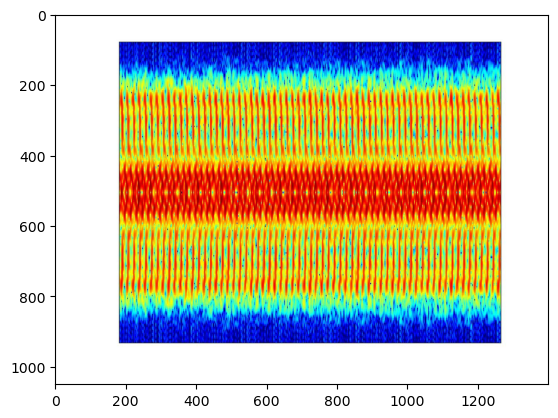

In [55]:
import matplotlib.pyplot as plt
img_raw = tf.io.read_file(all_image_paths[1])
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)
print(tf.reduce_min(img_tensor))
img_tensor = img_tensor/255
print(tf.reduce_max(img_tensor))
pil_img = tf.keras.preprocessing.image.array_to_img(img_tensor)
print(type(pil_img))
plt.imshow(pil_img)

In [40]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])


TypeError: '_TensorSliceDataset' object is not subscriptable

In [45]:
len(dataset)

3